In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from graphviz import pipe_lines
from mlflow import catboost
from mlflow.metrics import f1_score
from pandas.core.common import random_state
from scipy.constants import precision
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy.sql.util import criterion_as_pairs
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.metrics import precision_score, recall_score, f1_score

from lightgbm import LGBMClassifier
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
from sklearn.metrics import average_precision_score
import mlflow
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
mlflow.set_registry_uri('http://34.72.253.252:8000')
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import phik 
import joblib

In [3]:

df = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


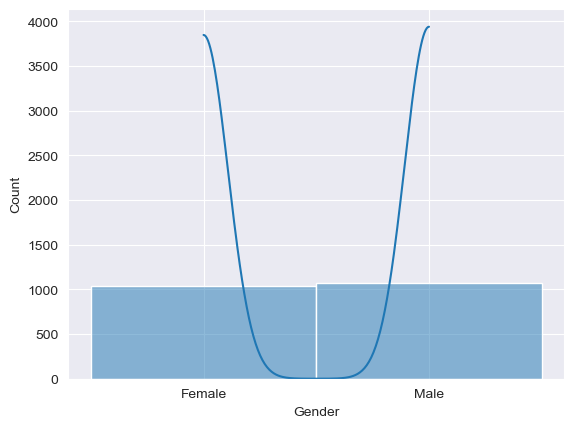

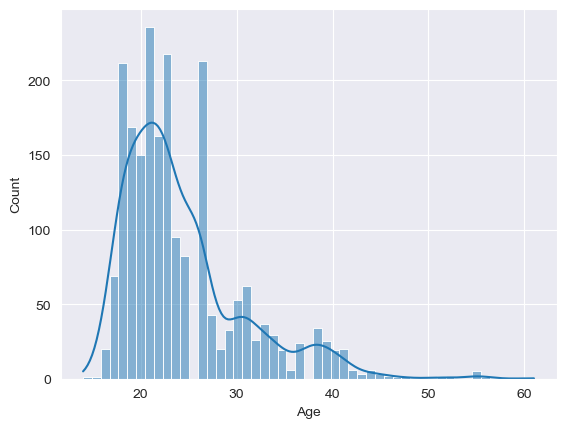

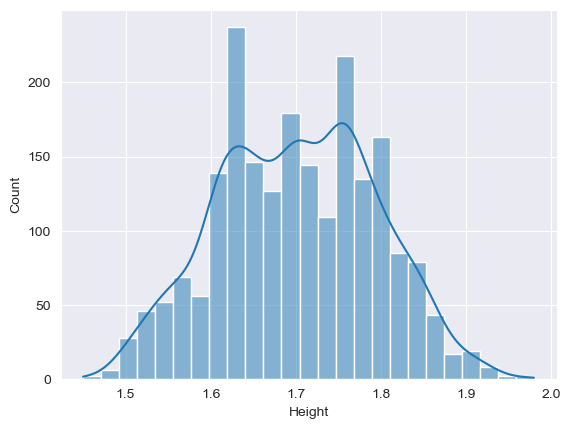

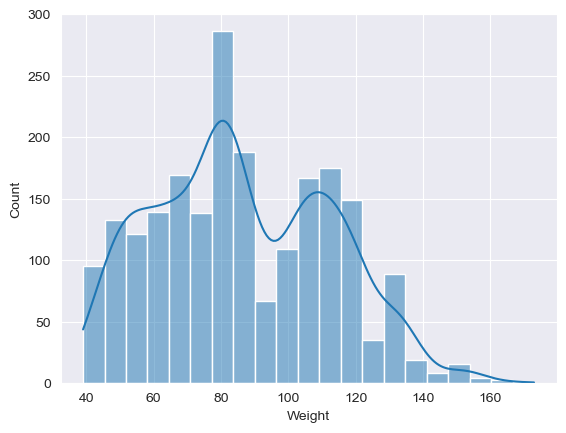

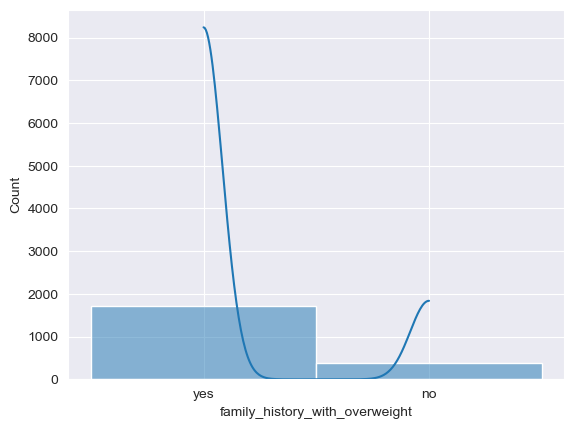

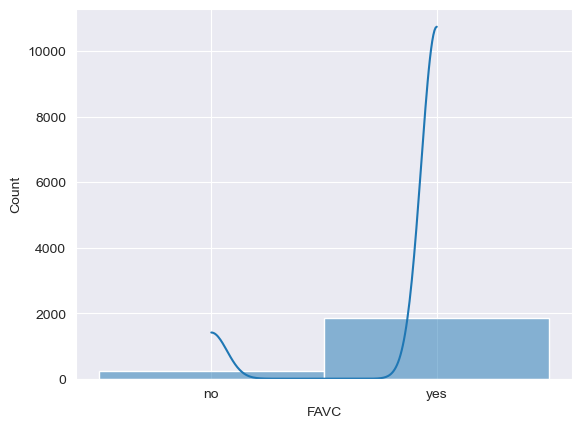

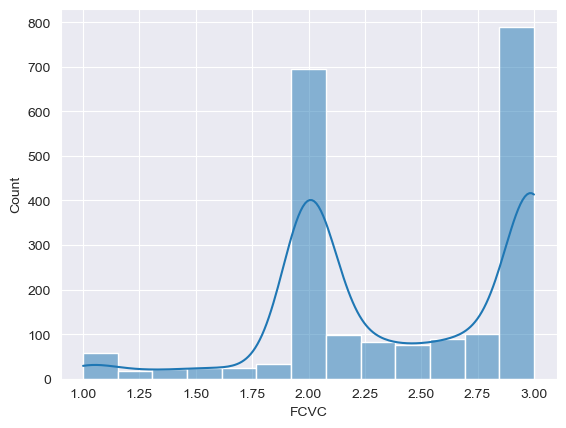

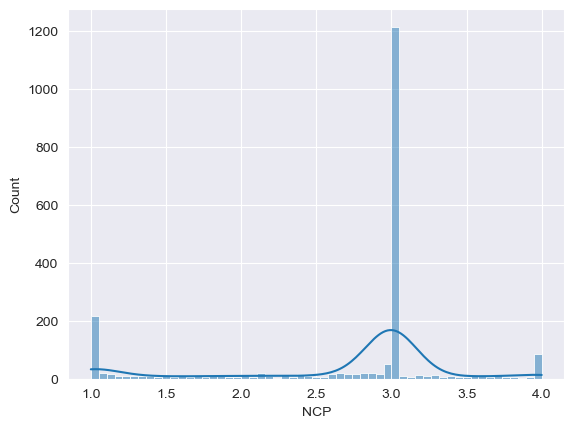

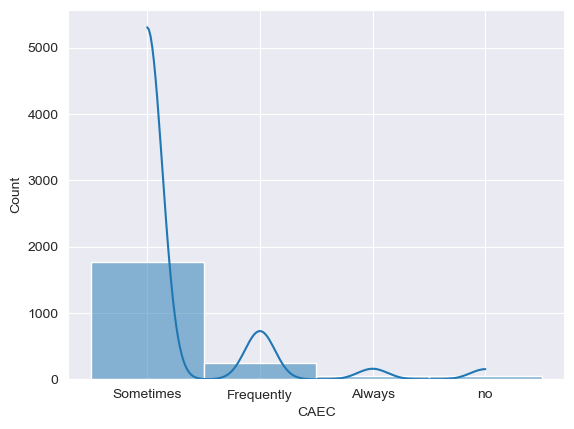

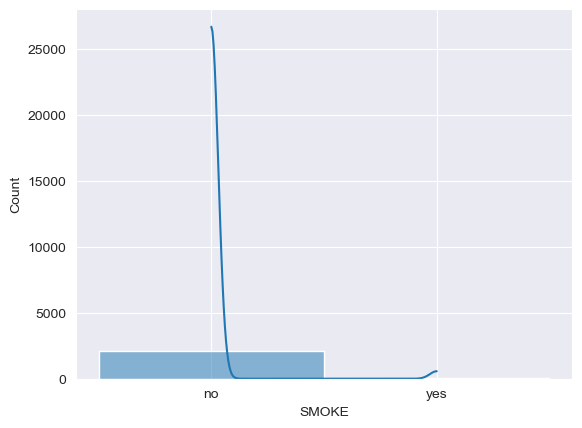

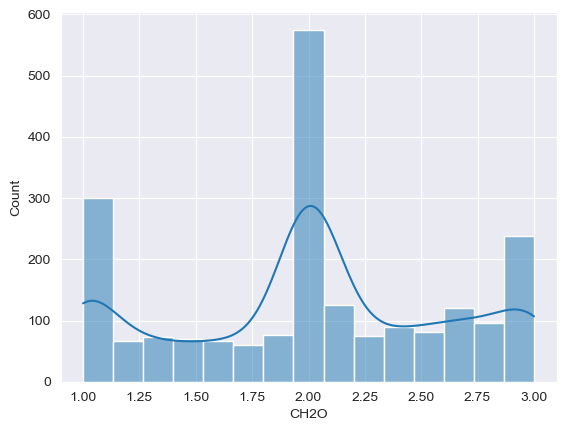

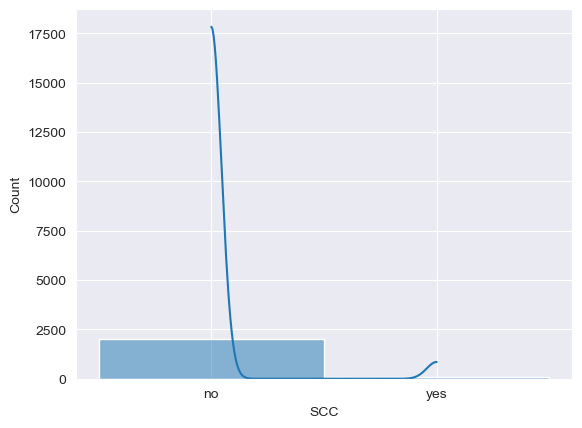

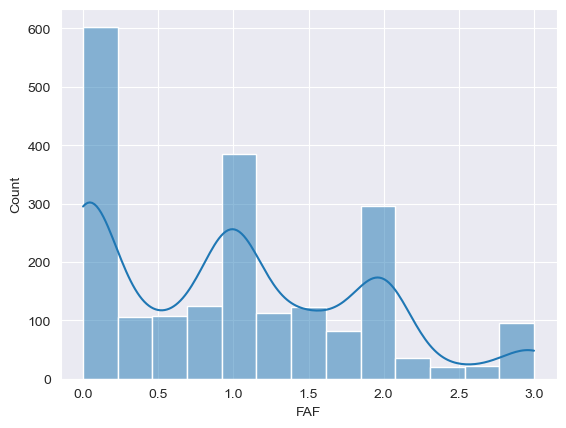

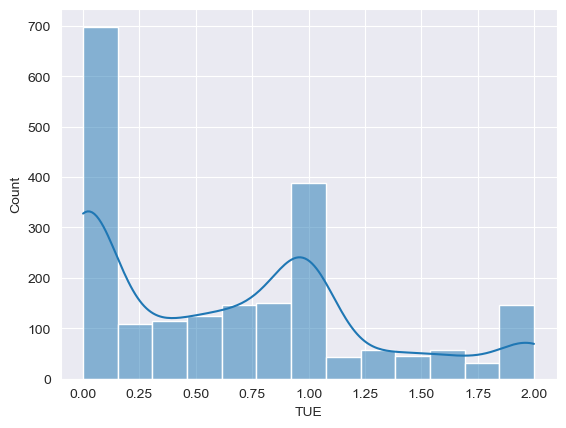

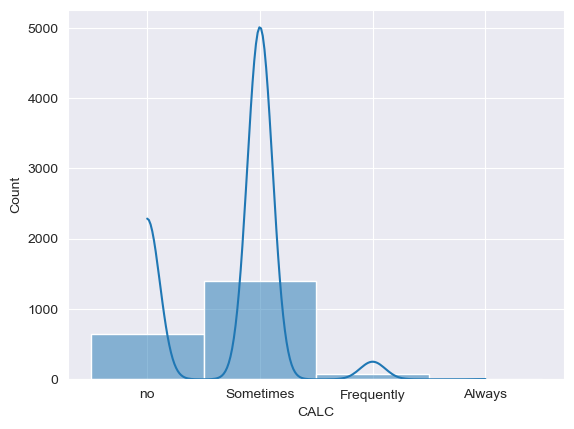

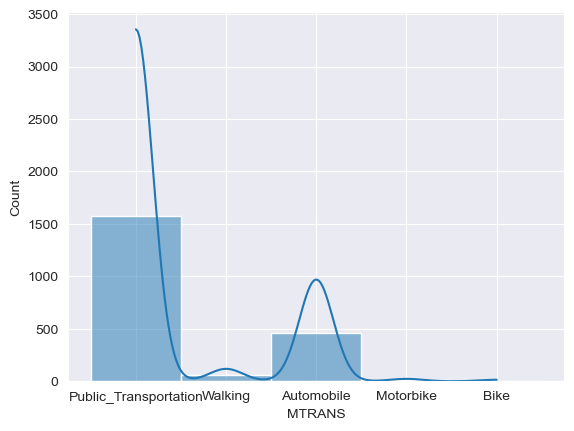

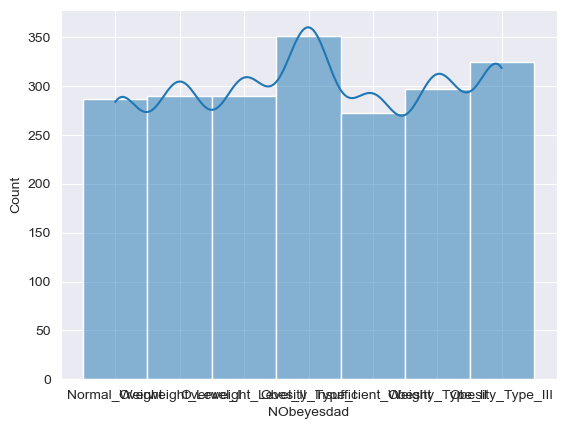

In [6]:
for col in df.columns:
    sns.histplot(data = df, x=col, kde=True)
    plt.show()

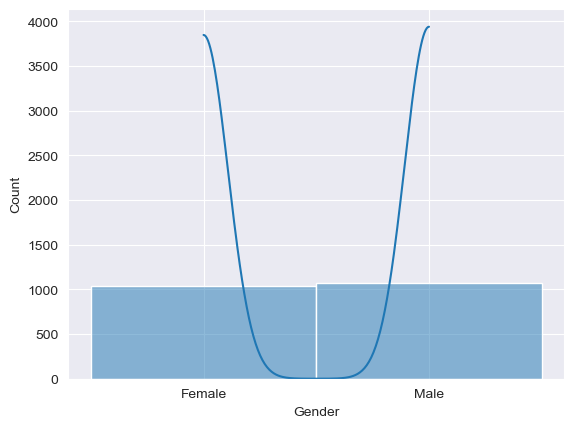

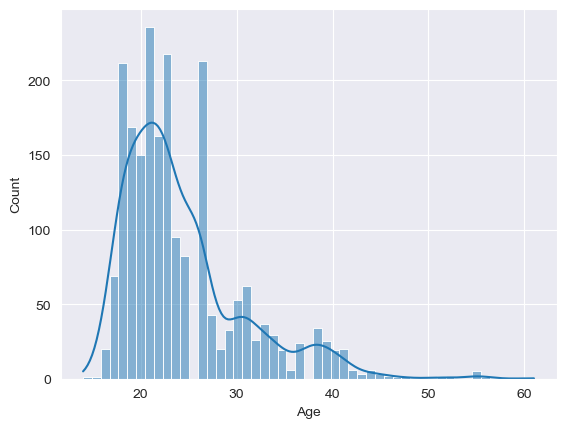

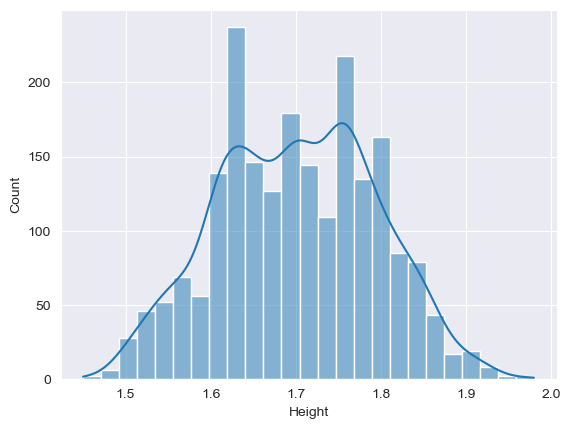

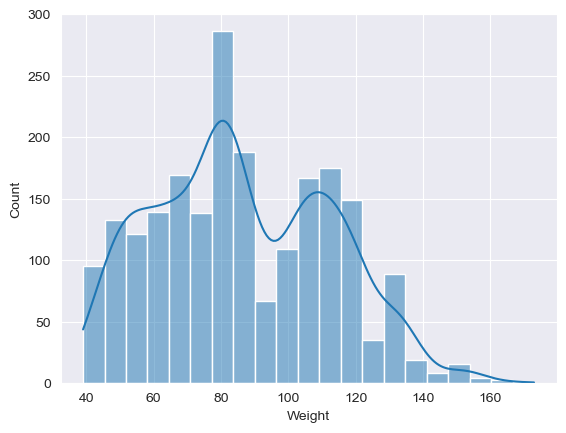

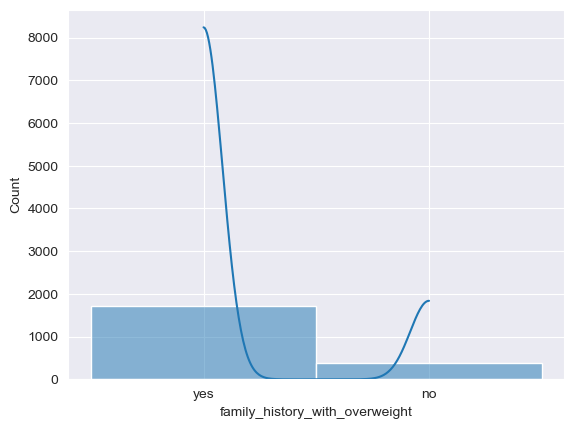

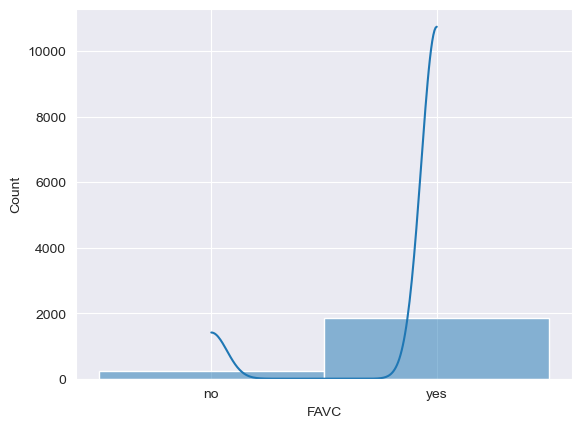

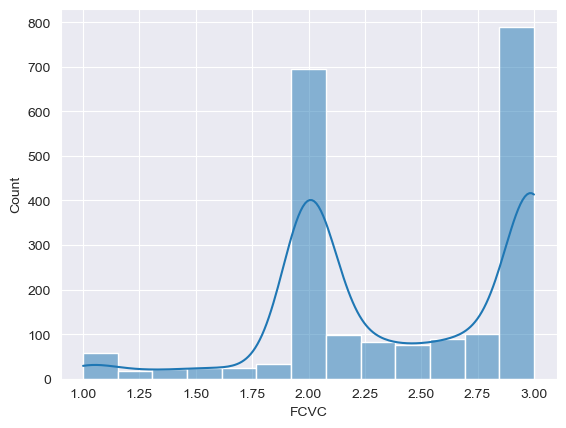

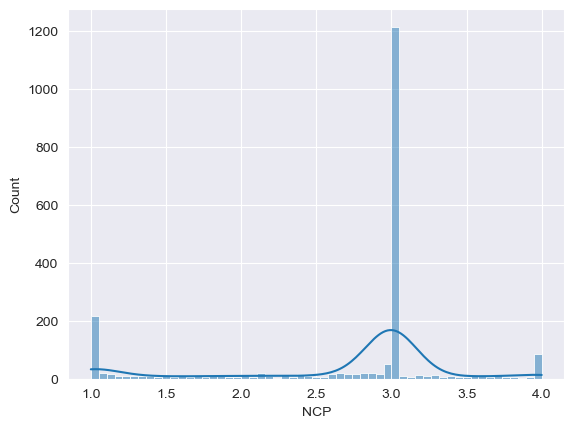

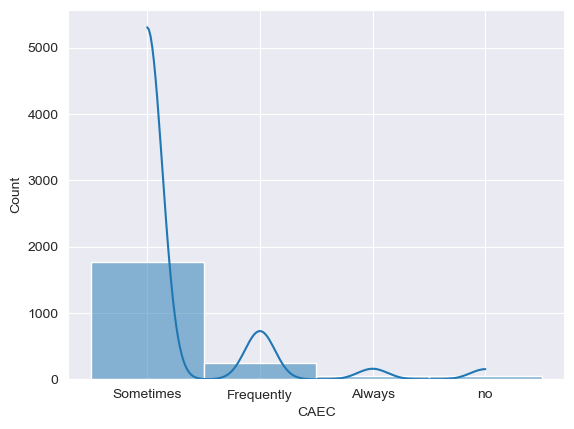

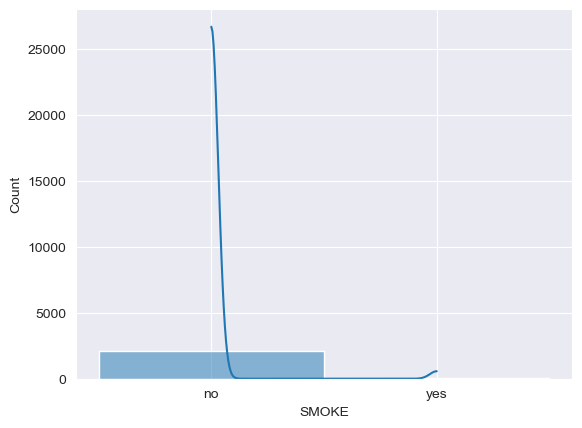

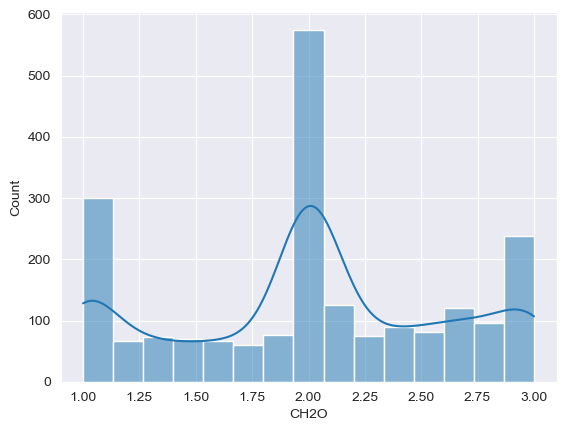

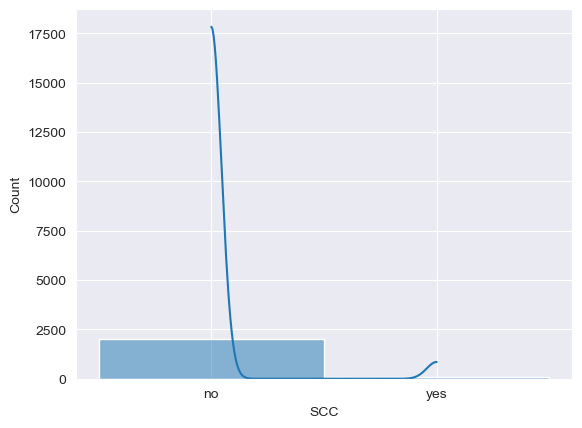

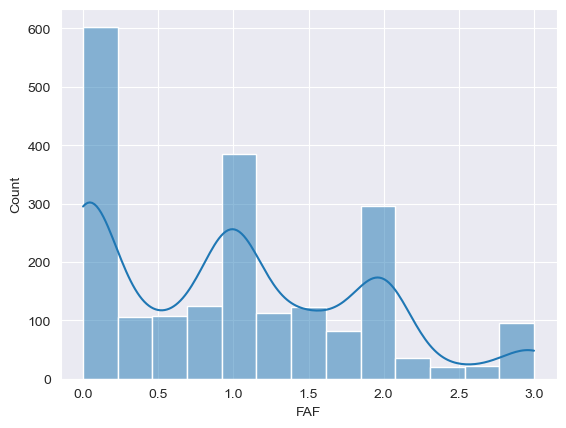

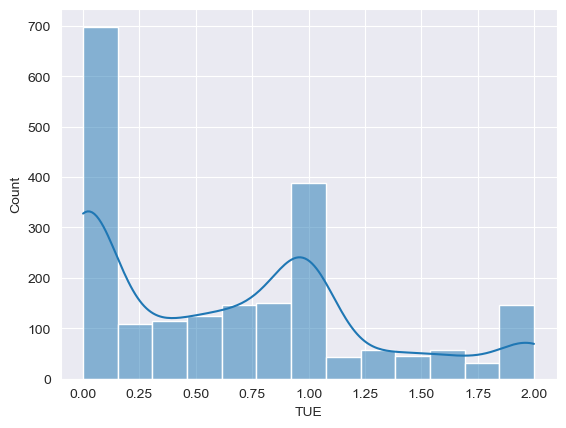

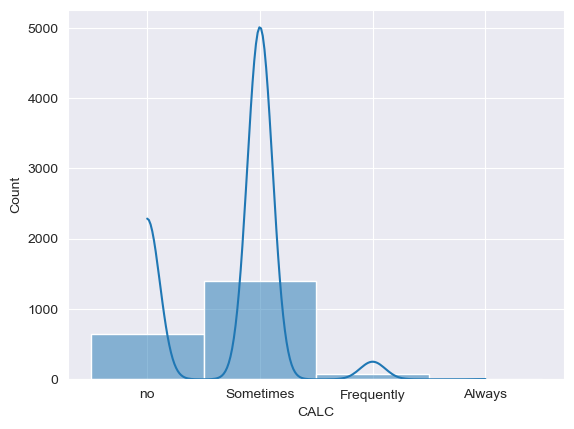

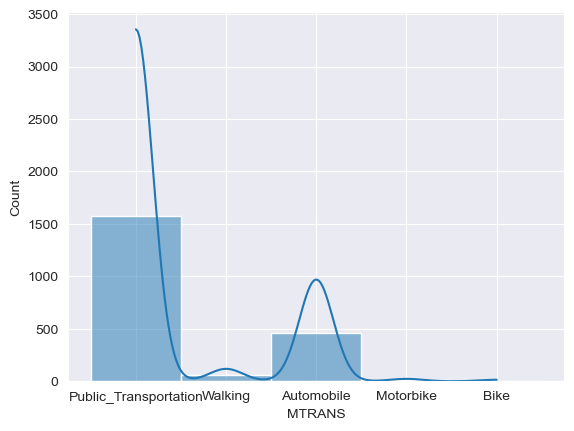

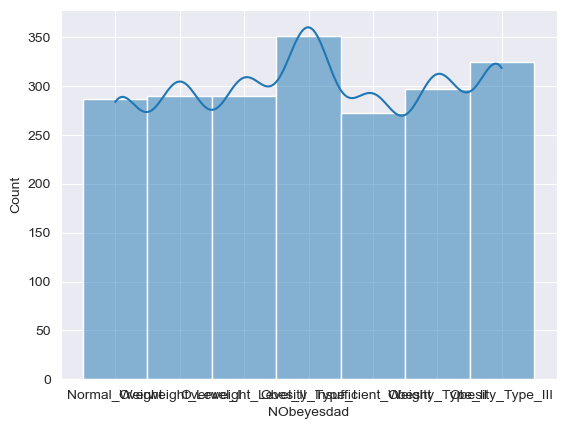

In [7]:
for col in df.columns:
    sns.histplot(data = df, x=col, kde=30)
    plt.show()

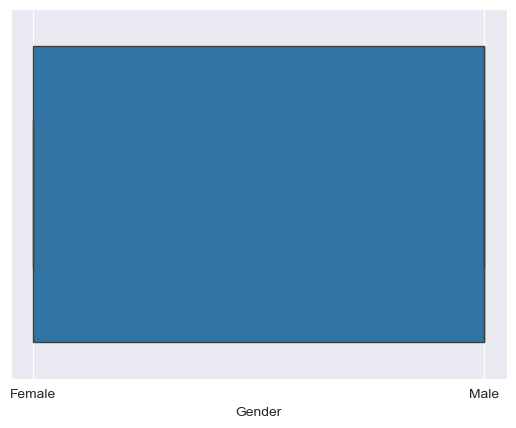

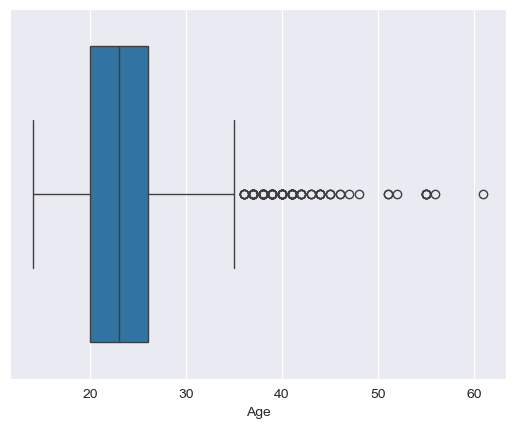

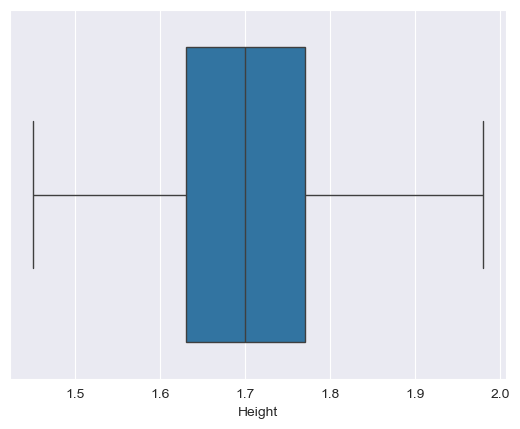

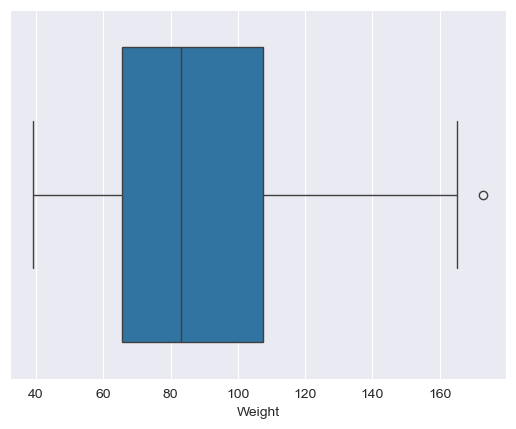

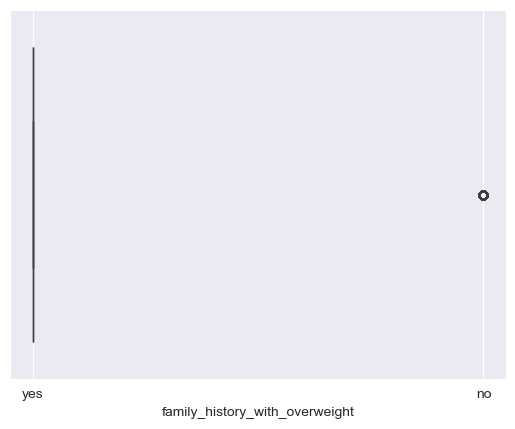

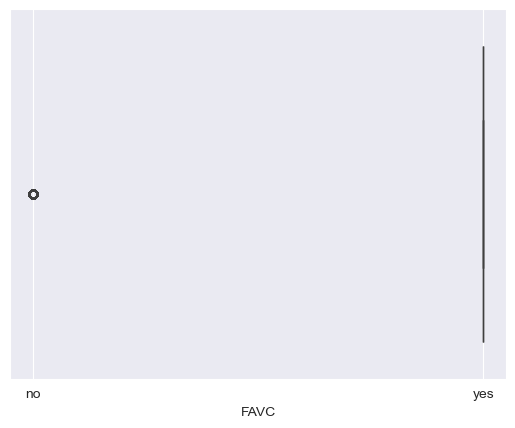

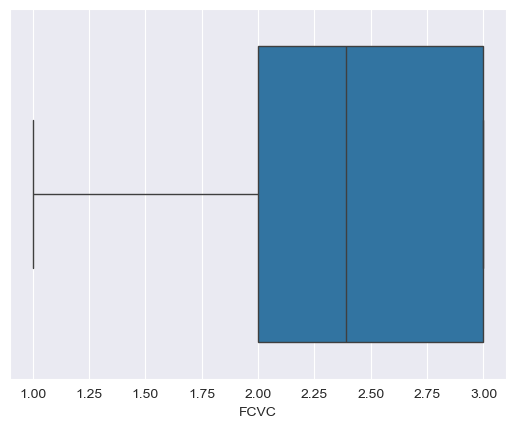

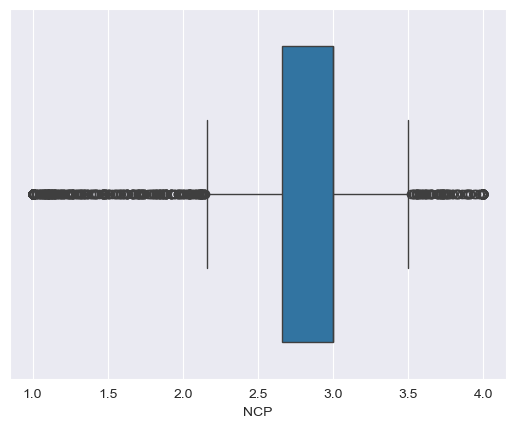

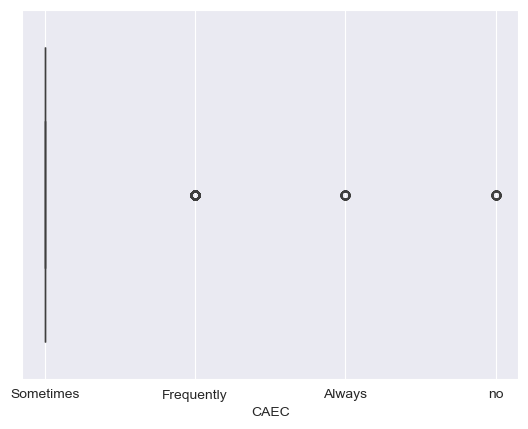

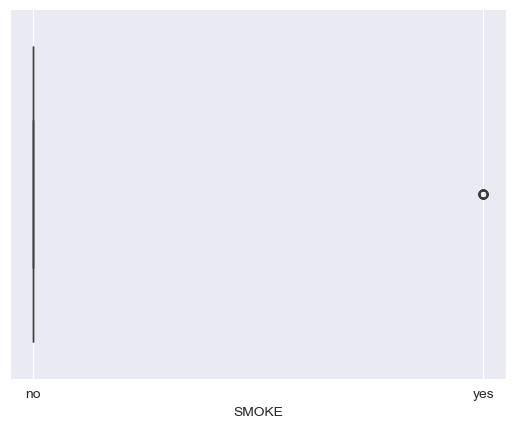

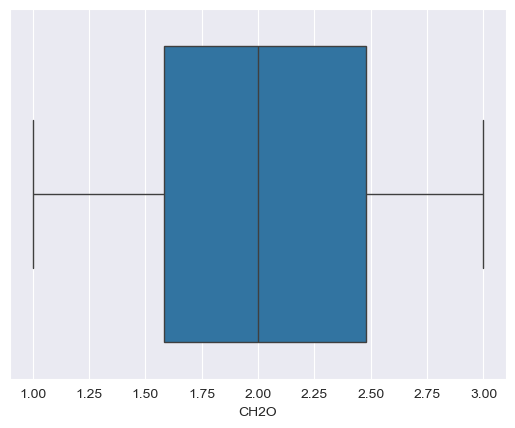

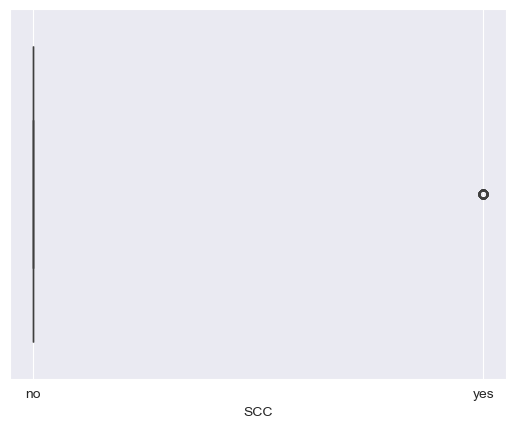

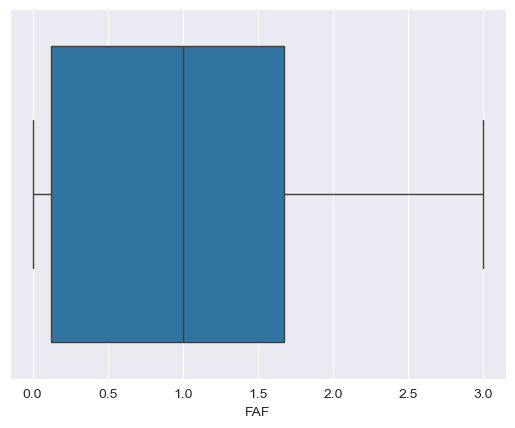

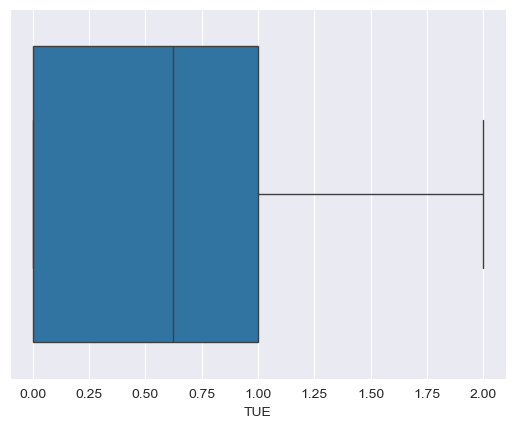

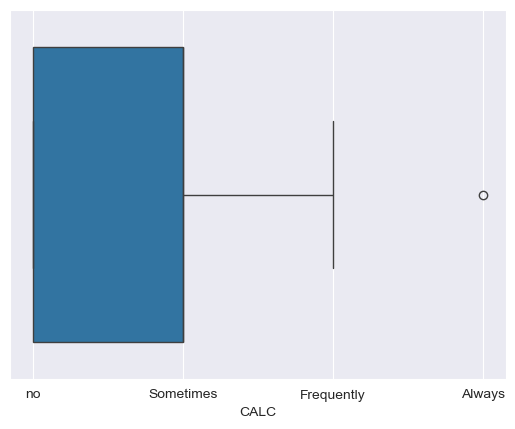

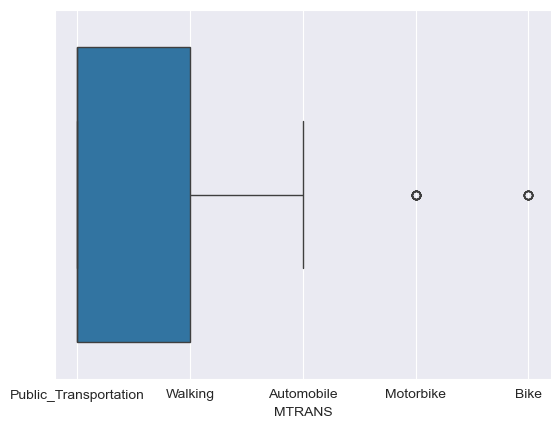

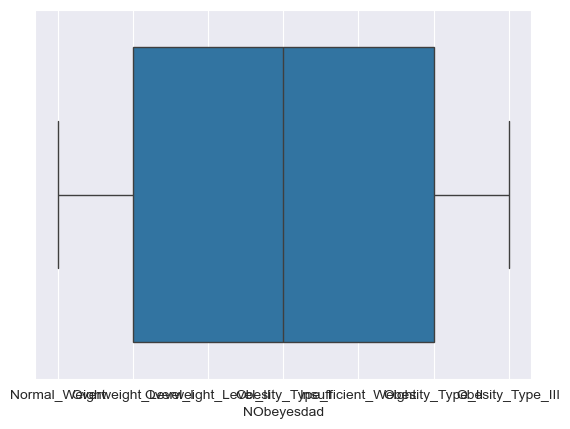

In [8]:
for col in df.columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [9]:
df.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [10]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [11]:
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1930,Female,26,1.63,105.43,yes,yes,3.00,3.00,Sometimes,no,1.48,no,0.10,0.663,Sometimes,Public_Transportation
1803,Female,26,1.66,111.93,yes,yes,3.00,3.00,Sometimes,no,2.77,no,0.00,0.138,Sometimes,Public_Transportation
1198,Male,18,1.75,86.37,yes,yes,2.91,3.00,Sometimes,no,2.74,no,1.22,0.038,Sometimes,Public_Transportation
15,Female,22,1.70,66.00,yes,no,3.00,3.00,Always,no,2.00,yes,2.00,1.000,Sometimes,Public_Transportation
816,Male,23,1.67,75.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,0.13,1.984,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Male,32,1.75,120.10,yes,yes,2.97,3.00,Sometimes,no,2.53,no,0.96,1.339,Sometimes,Automobile
1095,Male,23,1.72,81.67,yes,yes,2.00,1.73,Sometimes,no,1.40,no,0.89,1.012,Sometimes,Public_Transportation
1130,Female,23,1.65,80.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,0.15,2.000,no,Public_Transportation
1294,Female,23,1.63,84.50,yes,yes,2.06,2.96,Sometimes,no,2.01,no,0.85,0.631,no,Public_Transportation


In [14]:
X_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
544,Female,20,1.76,53.70,yes,yes,2.00,3.89,Frequently,no,1.86,no,2.87,2.000,no,Public_Transportation
1987,Female,26,1.62,111.00,yes,yes,3.00,3.00,Sometimes,no,2.70,no,0.00,0.323,Sometimes,Public_Transportation
420,Male,18,1.85,60.00,yes,yes,3.00,4.00,Sometimes,no,2.00,yes,2.00,0.000,Sometimes,Automobile
527,Female,21,1.52,42.00,no,yes,3.00,1.00,Frequently,no,1.00,no,0.00,0.000,Sometimes,Public_Transportation
196,Male,22,1.75,74.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,1.00,2.000,Sometimes,Bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,Female,22,1.60,66.13,yes,yes,2.21,3.00,Sometimes,no,2.05,no,2.17,0.000,Sometimes,Public_Transportation
518,Female,24,1.60,45.00,no,no,2.59,3.00,Frequently,no,2.07,no,1.68,0.000,no,Public_Transportation
781,Female,24,1.60,64.81,no,yes,2.90,3.00,Sometimes,no,1.55,no,0.00,0.274,Sometimes,Public_Transportation
334,Female,18,1.45,53.00,no,yes,2.00,3.00,Frequently,no,2.00,yes,1.00,2.000,Frequently,Public_Transportation


In [15]:
y_train


1930       Obesity_Type_III
1803       Obesity_Type_III
1198    Overweight_Level_II
15            Normal_Weight
816      Overweight_Level_I
               ...         
1638        Obesity_Type_II
1095    Overweight_Level_II
1130    Overweight_Level_II
1294         Obesity_Type_I
860      Overweight_Level_I
Name: NObeyesdad, Length: 1477, dtype: object

In [16]:
print(sorted(set(y_train)))


['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


In [17]:
y_test

544     Insufficient_Weight
1987       Obesity_Type_III
420     Insufficient_Weight
527     Insufficient_Weight
196           Normal_Weight
               ...         
936      Overweight_Level_I
518     Insufficient_Weight
781      Overweight_Level_I
334      Overweight_Level_I
1523        Obesity_Type_II
Name: NObeyesdad, Length: 634, dtype: object

In [18]:
# This selects only numeric columns (int or float)
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.head())


   Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
0   21    1.62    64.0   2.0  3.0   2.0  0.0  1.0
1   21    1.52    56.0   3.0  3.0   3.0  3.0  0.0
2   23    1.80    77.0   2.0  3.0   2.0  2.0  1.0
3   27    1.80    87.0   3.0  3.0   2.0  2.0  0.0
4   22    1.78    89.8   2.0  1.0   2.0  0.0  0.0


In [19]:
numeric_df = df.select_dtypes(include=['number'])
#phik correlation

phik_corr = numeric_df.phik_matrix()
print(phik_corr)

# Pearson correlation
print("Pearson correlation:\n", numeric_df.corr(method='pearson'))

# Kendall correlation
print("\nKendall correlation:\n", numeric_df.corr(method='kendall'))

# Spearman correlation
print("\nSpearman correlation:\n", numeric_df.corr(method='spearman'))

interval columns not set, guessing: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000  0.387527  0.589669  0.286317  0.319621  0.305862  0.324074   
Height  0.387527  1.000000  0.623419  0.277616  0.347018  0.394989  0.439199   
Weight  0.589669  0.623419  1.000000  0.448815  0.477211  0.545547  0.515231   
FCVC    0.286317  0.277616  0.448815  1.000000  0.269618  0.351262  0.288521   
NCP     0.319621  0.347018  0.477211  0.269618  1.000000  0.277883  0.371770   
CH2O    0.305862  0.394989  0.545547  0.351262  0.277883  1.000000  0.340492   
FAF     0.324074  0.439199  0.515231  0.288521  0.371770  0.340492  1.000000   
TUE     0.394900  0.267608  0.461007  0.342873  0.244713  0.327778  0.370626   

             TUE  
Age     0.394900  
Height  0.267608  
Weight  0.461007  
FCVC    0.342873  
NCP     0.244713  
CH2O    0.327778  
FAF     0.370626  
TUE     1.000000  
Pearson

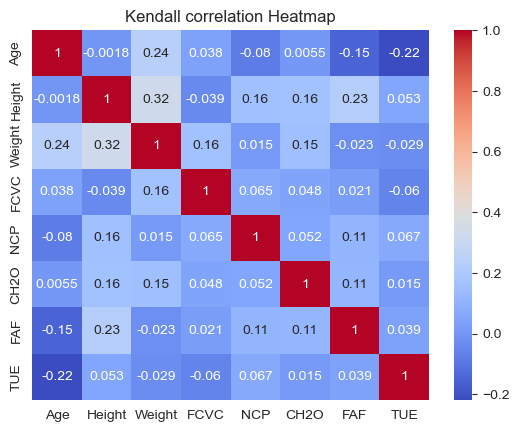

In [20]:
sns.heatmap(numeric_df.corr(method='kendall'), annot=True, cmap='coolwarm')
plt.title("Kendall correlation Heatmap")
plt.show()

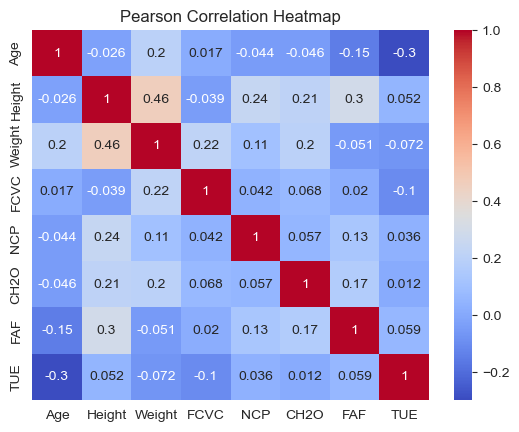

In [21]:
sns.heatmap(numeric_df.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

In [22]:
df.select_dtypes

<bound method DataFrame.select_dtypes of       Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62   64.00                            yes   no   2.0   
1     Female   21    1.52   56.00                            yes   no   3.0   
2       Male   23    1.80   77.00                            yes   no   2.0   
3       Male   27    1.80   87.00                             no   no   3.0   
4       Male   22    1.78   89.80                             no   no   2.0   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71  131.41                            yes  yes   3.0   
2107  Female   22    1.75  133.74                            yes  yes   3.0   
2108  Female   23    1.75  133.69                            yes  yes   3.0   
2109  Female   24    1.74  133.35                            yes  yes   3.0   
2110  Female   24    1.74  133.47                            yes  yes   3.0   

      NCP 

In [23]:
df.select_dtypes(include=['object'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [24]:
numeric_features = X_train.select_dtypes(include=['number']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

In [25]:
#le = LabelEncoder()
#y_train_encoded = le.fit_transform(y_train)
#y_test_encoded = le.transform(y_test)

In [26]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
#joblib.dump(label_encoder, 'label_encoder.pkl')

In [27]:
num_pipe_dtc = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('pt',  PowerTransformer()),
    #('scaler', StandardScaler()),
])

cat_pipe_dtc = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

preprocessor_dtc = ColumnTransformer([
    
    ('num', num_pipe_dtc, numeric_features),
    ('cat', cat_pipe_dtc, cat_features)
])
 
dtc_pipeline = Pipeline([
    ('preprocessor', preprocessor_dtc),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
 
dtc_pipeline.fit(X_train, y_train)




num_pipe_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('pt',  PowerTransformer()),
    #('scaler', StandardScaler()),
])
cat_pipe_rf = Pipeline([
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])
preprocessor_rf = ColumnTransformer([
    ('num', num_pipe_rf, numeric_features),
    ('cat', cat_pipe_dtc, cat_features)
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]



num_pipe_xgb = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler()),
    ('pt',  PowerTransformer()),
])
cat_pipe_xgb = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

preprocessor_xgb = ColumnTransformer([
    ('num', num_pipe_xgb, numeric_features),
    ('cat', cat_pipe_xgb, cat_features)
])


xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor_xgb),
    ('classifier', XGBClassifier(random_state=42))
])

xgb_pipeline.fit(X_train, y_train_encoded)
xgb_pred = xgb_pipeline.predict(X_test)
xgb_prob = xgb_pipeline.predict_proba(X_test)




#set up cat features and remainder passthrough
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

# Pass through categorical columns without preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features),
        
    ],
    remainder='passthrough'  # This will leave other columns (categorical) untouched
)

# CatBoost pipeline
cat_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0, 
                                      cat_features=['remainder__'+ col for col in cat_features]))
])

cat_pipeline.fit(X_train, y_train)
cat_pred = cat_pipeline.predict(X_test)
cat_prob = cat_pipeline.predict_proba(X_test)




In [28]:
preprocessor.fit_transform(X_train, y_train)

,num__Age,num__Height,num__Weight,num__FCVC,num__NCP,num__CH2O,num__FAF,num__TUE,remainder__Gender,remainder__family_history_with_overweight,remainder__FAVC,remainder__CAEC,remainder__SMOKE,remainder__SCC,remainder__CALC,remainder__MTRANS
1930,26.0,1.63,105.43,3.00,3.00,1.48,0.10,0.663,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1803,26.0,1.66,111.93,3.00,3.00,2.77,0.00,0.138,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1198,18.0,1.75,86.37,2.91,3.00,2.74,1.22,0.038,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
15,22.0,1.70,66.00,3.00,3.00,2.00,2.00,1.000,Female,yes,no,Always,no,yes,Sometimes,Public_Transportation
816,23.0,1.67,75.00,2.00,3.00,2.00,0.13,1.984,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,32.0,1.75,120.10,2.97,3.00,2.53,0.96,1.339,Male,yes,yes,Sometimes,no,no,Sometimes,Automobile
1095,23.0,1.72,81.67,2.00,1.73,1.40,0.89,1.012,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1130,23.0,1.65,80.00,2.00,3.00,2.00,0.15,2.000,Female,yes,yes,Sometimes,no,no,no,Public_Transportation
1294,23.0,1.63,84.50,2.06,2.96,2.01,0.85,0.631,Female,yes,yes,Sometimes,no,no,no,Public_Transportation


In [29]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500, step=50),
        "max_depth": trial.suggest_int("max_depth", 2, 32),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 0.3, 0.5, 0.7]),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
    }

    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor_rf),
        ('rf', RandomForestClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            min_samples_leaf=params['min_samples_leaf'],
            max_features=params['max_features'],
            criterion=params['criterion'],
            bootstrap=params['bootstrap'],
            random_state=42
        ))
    ])

    # Perform 5-fold cross-validation and return the average score
    score = cross_val_score(rf_pipeline, X, y, cv=5, scoring='accuracy').mean()
    return score

# Run the Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, timeout=600)  # Try 100 trials or stop after 10 mins

# Output the best trial
print("Best trial:")
print("Value:", study.best_trial.value)
print("Params:", study.best_trial.params)

# Train a final model using best parameters if desired
best_params = study.best_trial.params
final_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('rf', RandomForestClassifier(**best_params, random_state=42))
])

final_rf_pipeline.fit(X_train, y_train)
rf_pred = final_rf_pipeline.predict(X_test)
rf_probs = final_rf_pipeline.predict_proba(X_test)[:, 1]





[I 2025-05-13 19:05:23,949] A new study created in memory with name: no-name-ea266a63-7e62-4586-91f3-55a722078b93
[I 2025-05-13 19:05:32,029] Trial 0 finished with value: 0.920935990947083 and parameters: {'n_estimators': 100, 'max_depth': 17, 'min_samples_split': 18, 'min_samples_leaf': 19, 'max_features': 0.7, 'criterion': 'entropy', 'bootstrap': False}. Best is trial 0 with value: 0.920935990947083.
[I 2025-05-13 19:05:38,912] Trial 1 finished with value: 0.8812073543746429 and parameters: {'n_estimators': 400, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 12, 'max_features': 'log2', 'criterion': 'gini', 'bootstrap': False}. Best is trial 0 with value: 0.920935990947083.
[I 2025-05-13 19:05:46,356] Trial 2 finished with value: 0.8944483658812589 and parameters: {'n_estimators': 350, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 15, 'max_features': 0.3, 'criterion': 'gini', 'bootstrap': True}. Best is trial 0 with value: 0.920935990947083.
[I 2025-05-13 

Best trial:
Value: 0.9521954444108323
Params: {'n_estimators': 100, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.7, 'criterion': 'entropy', 'bootstrap': True}


In [30]:
best_params = study.best_trial.params
final_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('rf', RandomForestClassifier(**best_params, random_state=42))
])

final_rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('pt',
                                                                   PowerTransformer())]),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        max_features=0.7, min_samples_leaf=3,
                                        min_samples_split=10,
                                        random_state=42))])

In [31]:
def objective(trial):
    # Hyperparameters to optimize
    params = {
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "max_depth": trial.suggest_int("max_depth", 2, 32),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", [None, "sqrt", "log2"]),
        "splitter": trial.suggest_categorical("splitter", ["best", "random"]),
    }

    # Create the pipeline with the preprocessor and classifier
    dtc_pipeline = Pipeline([
        ('preprocessor', preprocessor_dtc),
        ('dtc', DecisionTreeClassifier(
            criterion=params['criterion'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            min_samples_leaf=params['min_samples_leaf'],
            max_features=params['max_features'],
            splitter=params['splitter']
        ))
    ])

    score = cross_val_score(dtc_pipeline, X, y, cv=5, n_jobs=-1).mean()
    return score


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Print the best trial
print("Best trial:")
print("Value:", study.best_trial.value)
print("Params:", study.best_trial.params)

# Train a final model using best parameters if desired
best_params = study.best_trial.params
final_dtc_pipeline = Pipeline([
    ('preprocessor', preprocessor_dtc),
    ('dtc', DecisionTreeClassifier(**best_params))
])

final_dtc_pipeline.fit(X_train, y_train)
dtc_pred = final_dtc_pipeline.predict(X_test)
dtc_probs = final_dtc_pipeline.predict_proba(X_test)


[I 2025-05-13 19:06:19,207] A new study created in memory with name: no-name-34e85fa8-9e02-4c86-93e3-165564e01ee0
[I 2025-05-13 19:06:20,234] Trial 0 finished with value: 0.7527847803435178 and parameters: {'criterion': 'gini', 'max_depth': 27, 'min_samples_split': 16, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'splitter': 'best'}. Best is trial 0 with value: 0.7527847803435178.
[I 2025-05-13 19:06:20,784] Trial 1 finished with value: 0.8039595307720748 and parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': None, 'splitter': 'random'}. Best is trial 1 with value: 0.8039595307720748.
[I 2025-05-13 19:06:20,954] Trial 2 finished with value: 0.6253784186525941 and parameters: {'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'splitter': 'random'}. Best is trial 1 with value: 0.8039595307720748.
[I 2025-05-13 19:06:21,129] Trial 3 finished with value: 0.79

Best trial:
Value: 0.9057723549908687
Params: {'criterion': 'gini', 'max_depth': 23, 'min_samples_split': 20, 'min_samples_leaf': 7, 'max_features': None, 'splitter': 'best'}


In [32]:
# Train a final model using best parameters if desired
best_params = study.best_trial.params
final_dtc_pipeline = Pipeline([
    ('preprocessor', preprocessor_dtc),
    ('dtc', DecisionTreeClassifier(**best_params))
])
final_dtc_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('pt',
                                                                   PowerTransformer())]),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])),
                ('dtc',
                 DecisionTreeClassifier(max_depth=23, min_samples_leaf=7,
                                        min_samples_split=20))])

In [33]:
mlflow.set_experiment("Random Forest")

<Experiment: artifact_location='file:///C:/Users/smalc/DataspellProjects/Obecity/mlruns/220028362199159215', creation_time=1745771422466, experiment_id='220028362199159215', last_update_time=1745771422466, lifecycle_stage='active', name='Random Forest', tags={}>

In [34]:
with mlflow.start_run():
    mlflow.sklearn.log_model(final_rf_pipeline, "model")
    mlflow.log_params(best_params)
    mlflow.log_metric("accuracy", accuracy_score(y_test, rf_pred))
    #mlflow.log_metric("f1_score", f1_score(y_test, rf_pred, average='weighted'))
    #mlflow.log_metric("roc_auc", roc_auc_score(y_test_encoded, rf_probs))
    mlflow.end_run()
    


2025/05/13 19:06:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [35]:
mlflow.set_experiment("Decision Tree")


<Experiment: artifact_location='file:///C:/Users/smalc/DataspellProjects/Obecity/mlruns/183653049610586798', creation_time=1745771589090, experiment_id='183653049610586798', last_update_time=1745771589090, lifecycle_stage='active', name='Decision Tree', tags={}>

In [36]:
with mlflow.start_run():
    mlflow.sklearn.log_model(final_dtc_pipeline, "model")
    mlflow.log_params(best_params)
    mlflow.log_metric("accuracy", accuracy_score(y_test, dtc_pred))
    #mlflow.log_metric("f1_score", f1_score(y_test, dtc_pred, average='weighted'))
    #mlflow.log_metric("roc_auc", roc_auc_score(y_test_encoded, dtc_probs))
    mlflow.end_run()

2025/05/13 19:06:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [37]:
classification_report_dtc = classification_report(y_test, dtc_pred)
print(classification_report_dtc)

classification_report_rf = classification_report(y_test, rf_pred)
print(classification_report_rf)

classification_report_xgb = classification_report(y_test_encoded, xgb_pred)
print(classification_report_xgb)

classification_report_cat = classification_report(y_test, cat_pred)
print(classification_report_cat)





                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.90      0.90        86
      Normal_Weight       0.82      0.80      0.81        93
     Obesity_Type_I       0.95      0.92      0.94       102
    Obesity_Type_II       0.96      0.97      0.96        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.79      0.90      0.84        88
Overweight_Level_II       0.93      0.86      0.89        79

           accuracy                           0.91       634
          macro avg       0.91      0.90      0.90       634
       weighted avg       0.91      0.91      0.91       634

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.95      0.95        86
      Normal_Weight       0.91      0.86      0.88        93
     Obesity_Type_I       0.96      0.94      0.95       102
    Obesity_Type_II       0.97      0.97      0.97        88
   Obesity_Type_III 

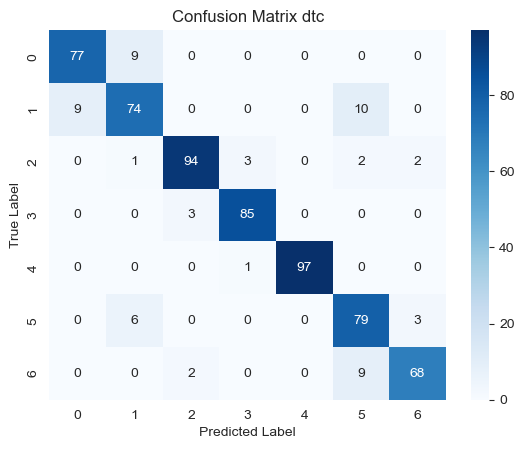

In [38]:
cm = confusion_matrix(y_test, dtc_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(len(y_test.unique())), yticklabels=range(len(y_test.unique())))
plt.title("Confusion Matrix dtc")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

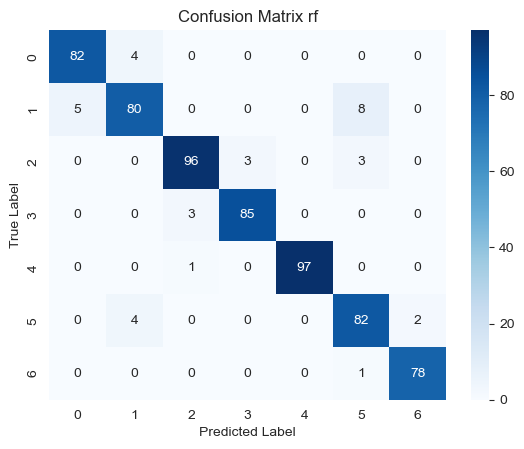

In [39]:
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(len(y_test.unique())), yticklabels=range(len(y_test.unique())))
plt.title("Confusion Matrix rf")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

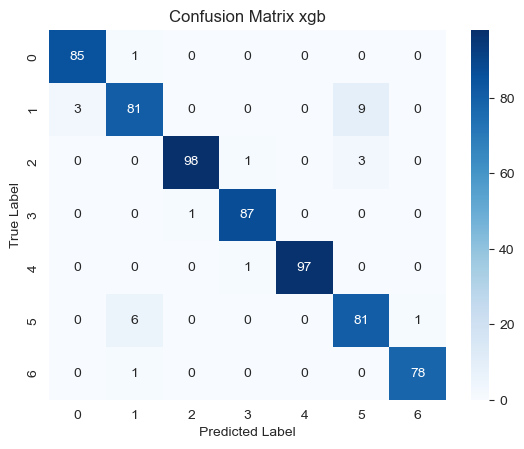

In [40]:
cm = confusion_matrix(y_test_encoded, xgb_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(len(y_test.unique())), yticklabels=range(len(y_test.unique())))
plt.title("Confusion Matrix xgb")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

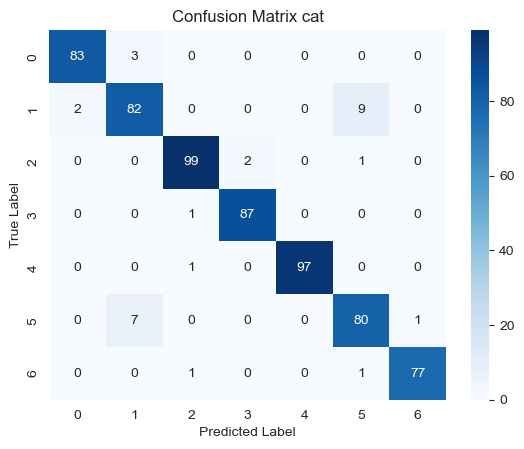

In [41]:
cm = confusion_matrix(y_test, cat_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(len(y_test.unique())), yticklabels=range(len(y_test.unique())))
plt.title("Confusion Matrix cat")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [42]:
def plot_roc_curve(y_true, y_pred, title):
    y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))
    y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_pred))
    
    fpr, tpr, _ = roc_curve(y_true_binarized.ravel(), y_pred_binarized.ravel())
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()



In [43]:
n_classes = len(np.unique(y_test))


In [44]:
n_classes


7

In [45]:
y_true_bin = label_binarize(y_test, classes=np.unique(y_test))

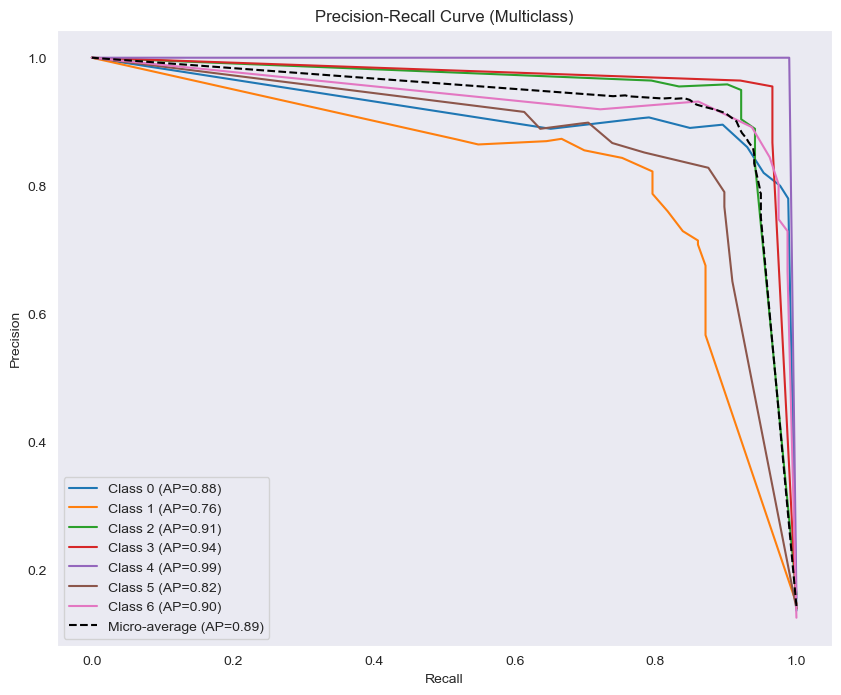

In [46]:
plt.figure(figsize=(10, 8))

# For each class
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], dtc_probs[:, i])
    ap_score = average_precision_score(y_true_bin[:, i], dtc_probs[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP={ap_score:.2f})')

# Optionally, add micro-average curve
precision_micro, recall_micro, _ = precision_recall_curve(y_true_bin.ravel(), dtc_probs.ravel())
ap_micro = average_precision_score(y_true_bin, dtc_probs, average="micro")
plt.plot(recall_micro, precision_micro, color='black', linestyle='--', label=f'Micro-average (AP={ap_micro:.2f})')

# Plot styling
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multiclass)')
plt.legend()
plt.grid()
plt.show()


In [47]:
y_test_binarized = label_binarize(y_test, classes=list(range(n_classes)))

y_test_binarized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [49]:
dtc_probs

array([[0.57142857, 0.42857143, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.41666667, 0.58333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.        , 0.55555556,
        0.11111111],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [50]:
dtc_probs

array([[0.57142857, 0.42857143, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.41666667, 0.58333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , ..., 0.        , 0.55555556,
        0.11111111],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [51]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

In [52]:
classes = np.unique(y_test)

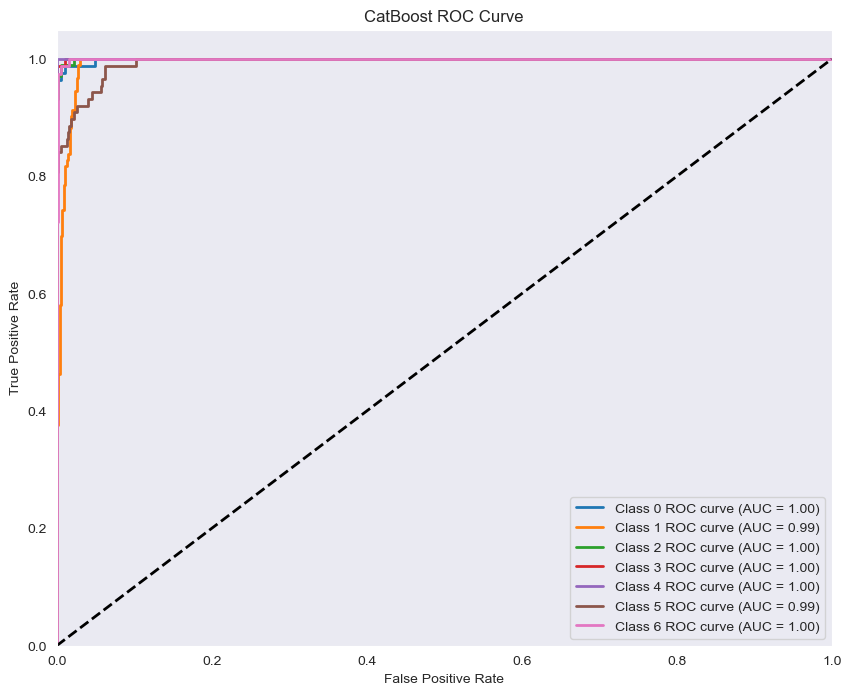

In [53]:
# CATBOOST ROC CURVE
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], cat_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot all ROC curves
plt.figure(figsize=(10, 8))

for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()







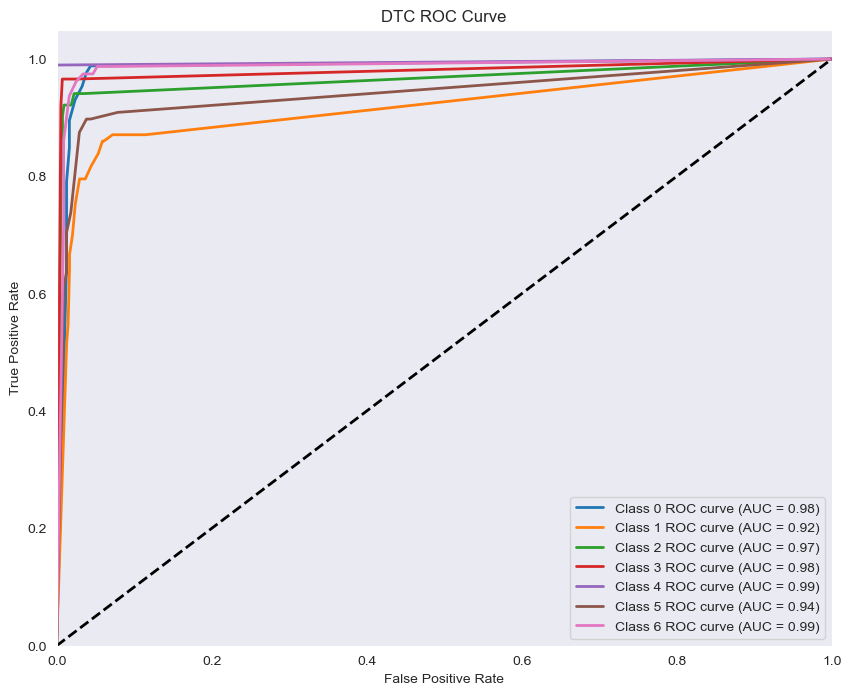

In [54]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], dtc_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2,
             label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DTC ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [55]:
accuracy_score_dtc = accuracy_score(y_test, dtc_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy_score_dtc}")
accuracy_score_rf = accuracy_score(y_test, rf_pred)
print(f"Random Forest Classifier Accuracy: {accuracy_score_rf}")
accuracy_score_xgb = accuracy_score(y_test_encoded, xgb_pred)
print(f"XGBoost Classifier Accuracy: {accuracy_score_xgb}")
accuracy_score_cat = accuracy_score(y_test, cat_pred)
print(f"CatBoost Classifier Accuracy: {accuracy_score_cat}")



Decision Tree Classifier Accuracy: 0.9053627760252366
Random Forest Classifier Accuracy: 0.9463722397476341
XGBoost Classifier Accuracy: 0.9574132492113565
CatBoost Classifier Accuracy: 0.9542586750788643


In [56]:
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()


for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train_encoded[col] = le.fit_transform(X_train[col])
        X_test_encoded[col] = le.transform(X_test[col])

In [57]:
ovr = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr.fit(X_train_encoded, y_train)
dtc_pred_probs = ovr.predict_proba(X_test_encoded)

C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\multiclass.py:503: RuntimeWarning: invalid value encountered in divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


In [58]:

label_binarize(y_test, classes=np.unique(y_test))

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [59]:
print(xgb_prob.shape)  # should be (n_samples, n_classes)
print(cat_prob.shape)
print(dtc_probs.shape)
print(y_test_bin.shape)  # should also be (n_samples, n_classes)


(634, 7)
(634, 7)
(634, 7)
(634, 7)


In [60]:
roc_auc_xgb = roc_auc_score(y_test_bin, xgb_prob, average="macro", multi_class="ovr")
print(f"ROC AUC (macro-average): {roc_auc_xgb:.2f}")

roc_auc_cat = roc_auc_score(y_test_bin, cat_prob, average="macro", multi_class="ovr")
print(f"ROC AUC (macro-average): {roc_auc_cat:.2f}")

roc_auc_dtc = roc_auc_score(y_test_bin, dtc_probs, average="macro", multi_class="ovr")
print(f"ROC AUC (macro-average): {roc_auc_dtc:.2f}")

ROC AUC (macro-average): 1.00
ROC AUC (macro-average): 1.00
ROC AUC (macro-average): 0.97


In [61]:
joblib.dump(xgb_pipeline, 'xgb_model.pkl')


['xgb_model.pkl']

In [62]:
joblib.dump(cat_pipeline, 'cat_model.pkl')

['cat_model.pkl']